<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/HR%20Department%3A%20Attrition%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 
Main objective here is to perform classification analysis to determine wheather employee will leave the company or not

## Significance of Analysis
- Hiring and retaining employees are extremely complex tasks that require capital tasks that require capital, time and skills. 
- Small Business owners spends 40% of their working hours on tasks that do not generate any income such as hiring. (Source [link text](https://toggl.com/blog/cost-of-hiring-an-employee#:~:text=Most%20of%20all%2C%20small%20business,help%20of%20outside%20recruitment%20support.))
- Companies spend 15-20% of employee's salary to recruit new candidate.(Source [link text](https://www.investopedia.com/financial-edge/0711/the-cost-of-hiring-a-new-employee.aspx)) 
- An average company loses anywhere b/w 1% and 2.5% of their total revenue on time it takes to bring a new hire up to speed. 
- Hiring a new employee costs an average of $7645(0-500 corporation)(Source [link text](https://www.tekshapers.com/blog/How-much-does-it-cost-to-hire-an-employee-in-2019#:~:text=In%20reports%20by%20the%20National,days%20to%20fill%20the%20position.))
- It takes 52 days on average to fill a position. 


### Importing Libraries and Dataset. 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
#importing dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_employee = pd.read_csv('/content/drive/MyDrive/Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df_employee.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df_employee.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#statistical description of data. 
df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Exploring Dataset 

In [9]:
# replacing 'Attritition', 'overtime', 'Over18' column with integers before performing any visualisations 
df_employee['Attrition'] = df_employee['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df_employee['Over18'] = df_employee['Over18'].apply(lambda x : 1 if x == 'Y' else 0)
df_employee['OverTime'] = df_employee['OverTime'].apply(lambda x : 1 if x =='Yes' else 0)

In [10]:
df_employee[['OverTime', 'Attrition', 'Over18']]

,OverTime,Attrition,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,1,0,1
4,0,0,1
...,...,...,...
1465,0,0,1
1466,0,0,1
1467,1,0,1
1468,0,0,1


<AxesSubplot:>

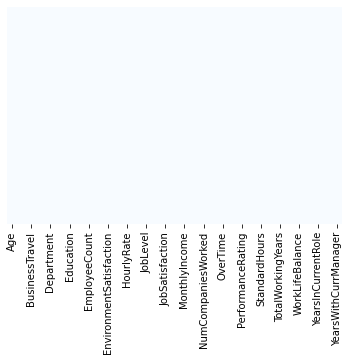

In [11]:
#checking that, if we have any missing data 
sns.heatmap(df_employee.isnull(), yticklabels = False, cbar= False, cmap = 'Blues')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

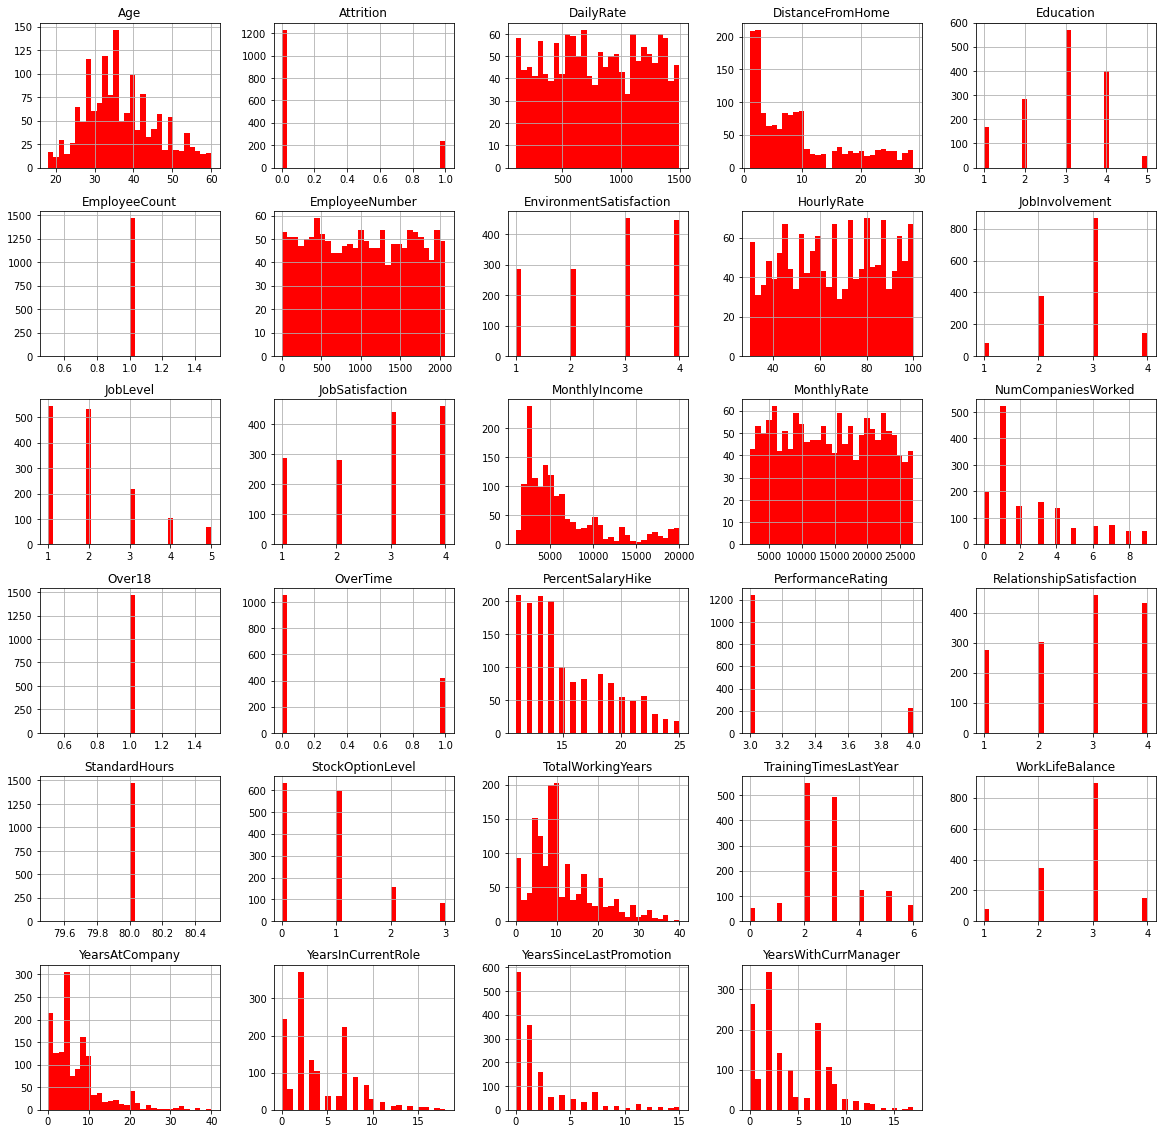

In [12]:
df_employee.hist(bins = 30, figsize = (20,20), color ='r')

In [13]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
df_employee.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [14]:
#how many employees left the company 
left_df = df_employee[df_employee['Attrition']==1]
stayed_df = df_employee[df_employee['Attrition']==0]

In [15]:
print('Total = ', len(df_employee))
print('Number of employees who left =', len(left_df))
print('% of employees who left =', 1.*len(left_df)/len(df_employee)*100, '%')

print('Number of employees who stayed =', len(stayed_df))
print('% of employees who stayed =', 1.*len(stayed_df)/len(df_employee)*100, '%')

Total =  1470
Number of employees who left = 237
% of employees who left = 16.122448979591837 %
Number of employees who stayed = 1233
% of employees who stayed = 83.87755102040816 %


In [16]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


- Employees who stayed have higher mean age than those of who left. 
- Employees who left have Daily rate of around 750 and those who stayed have around 812 Daily rate. 
- Average 'Ennvironment Satisfaction' and 'Job Satisfaction' is also higher among the employees who stayed 



<AxesSubplot:>

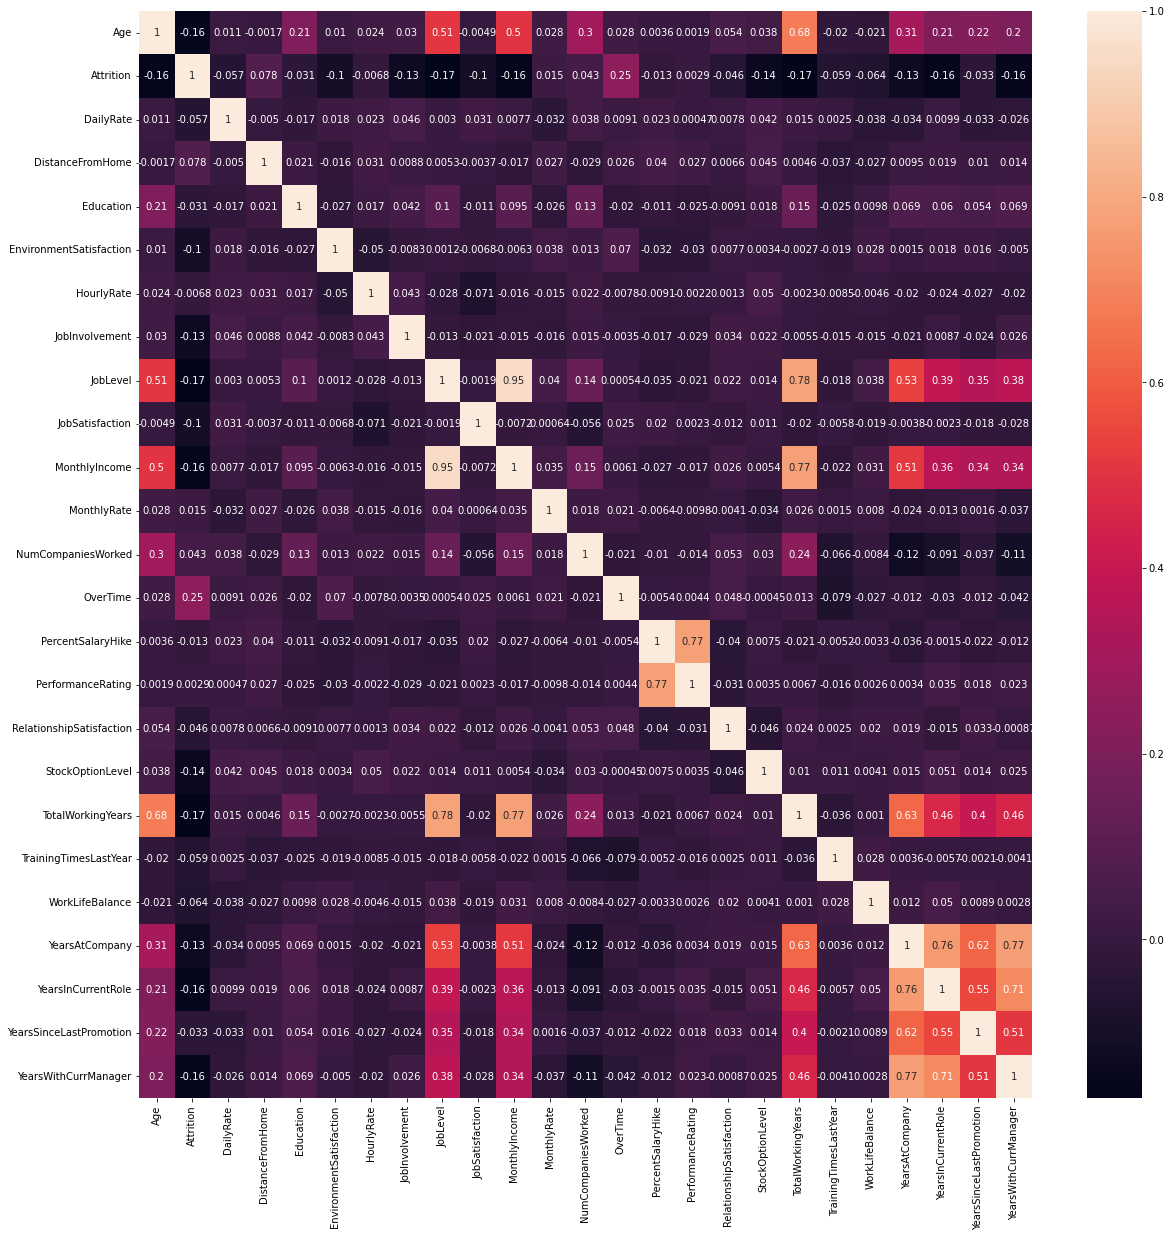

In [18]:
correlations = df_employee.corr()

f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

**Observatins** 
- Job level is strongle correlated with total working hours 
- Monthly income is strongly corelated with job level 
- Monthly income is strongly corelated with total working hours 
- Age is strongly correlated with monthly income. 

<AxesSubplot:xlabel='Age', ylabel='count'>

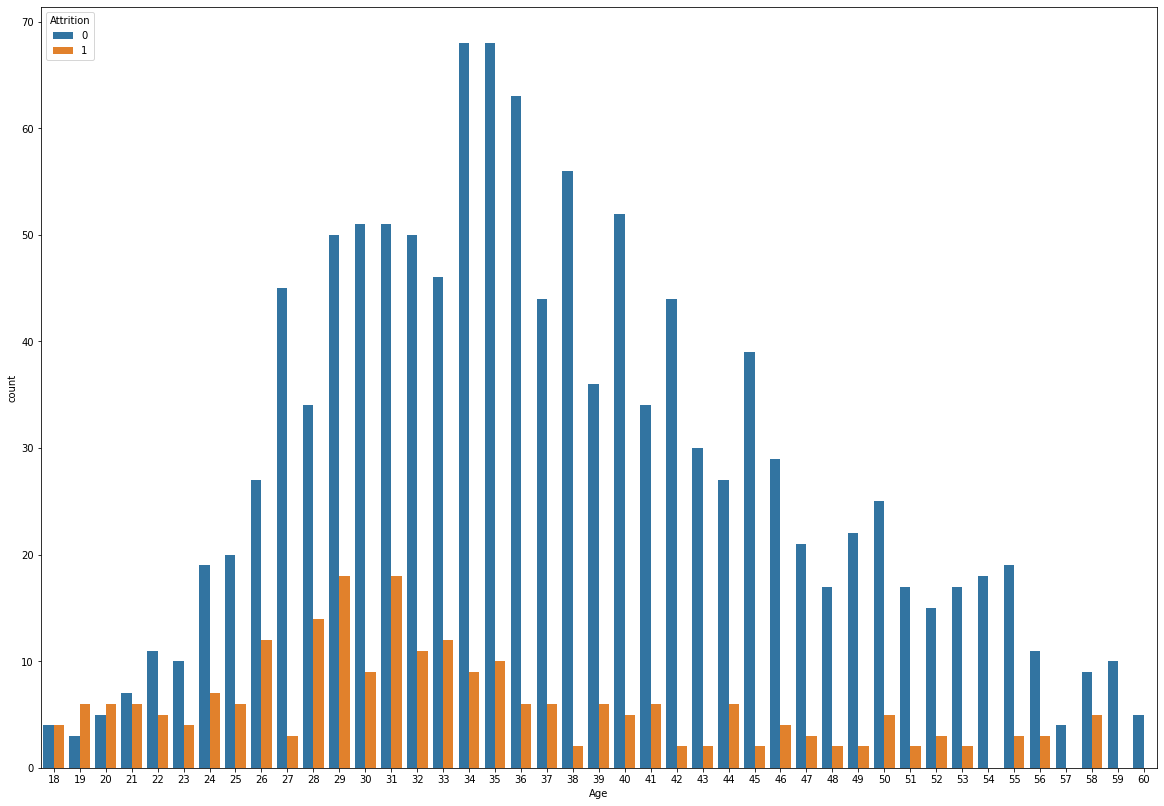

In [19]:
#relations between age and people leaving company
plt.figure(figsize = (20,14))
sns.countplot(x = df_employee.Age, hue = df_employee.Attrition)

It seems that age is one of the factor which impacts the people leaving or staying in the company. 

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

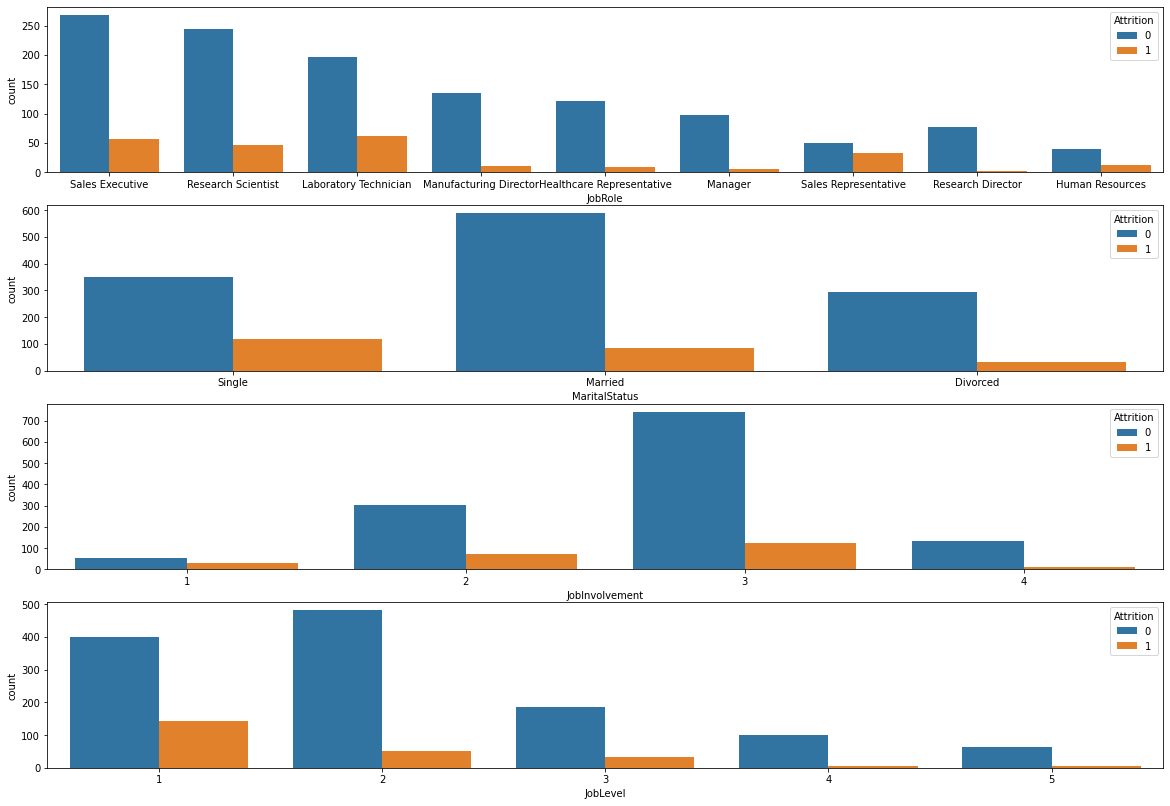

In [20]:
plt.figure(figsize = (20,14))

plt.subplot(411)
sns.countplot(x =df_employee.JobRole, hue = df_employee.Attrition )

plt.subplot(412)
sns.countplot(x =df_employee.MaritalStatus, hue = df_employee.Attrition )

plt.subplot(413)
sns.countplot(x =df_employee.JobInvolvement, hue = df_employee.Attrition )

plt.subplot(414)
sns.countplot(x =df_employee.JobLevel, hue = df_employee.Attrition )

Observations 
- Around half the percentage of Sales representative left the job, which means this type of job has higher turnover. Similar observation on Laboratory Technician. On other hand Jobs like Rsearch Director have very less leaving rate. 
- Single Employees tend to leave a lot more. 
- Employees who had low job involement, more of them left the job

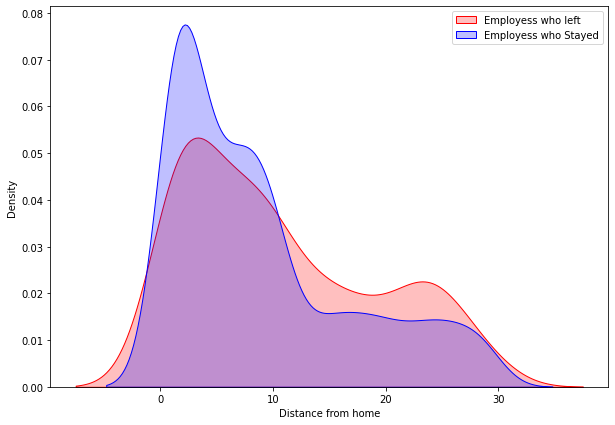

In [21]:
#Using KDE(Kernel Density Estimate) for visualising the probability density of a continous variable
#It describes probability density at different values in a continous variable

plt.figure(figsize = (10,7))
sns.kdeplot(left_df ['DistanceFromHome'], label = 'Employess who left', shade = True, color ='r')
sns.kdeplot(stayed_df ['DistanceFromHome'], label = 'Employess who Stayed', shade = True, color ='b')
plt.xlabel('Distance from home')
plt.legend()

As the distance increases, the employees who tend to leave(red one) increases. So there can be some correlation b/w the distance and employees who leave. 

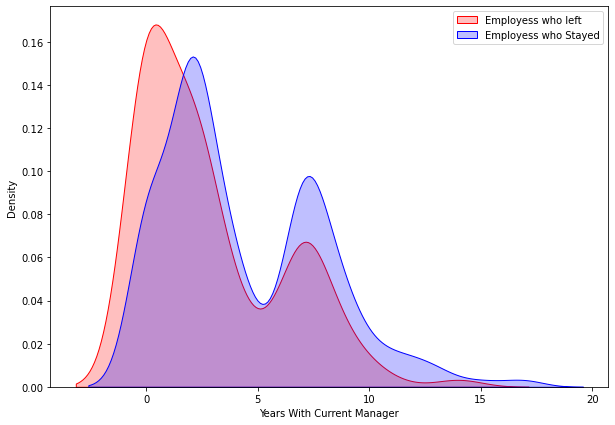

In [22]:
plt.figure(figsize = (10,7))
sns.kdeplot(left_df ['YearsWithCurrManager'], label = 'Employess who left', shade = True, color ='r')
sns.kdeplot(stayed_df ['YearsWithCurrManager'], label = 'Employess who Stayed', shade = True, color ='b')
plt.xlabel('Years With Current Manager')
plt.legend()

If we have some number of years with current manager, employees tends to leave more. However as we increase the number of years, the blue shade tends to supersede the red. 
From Figure its visible, beyond 5 years the employees tends to stay in the company. 

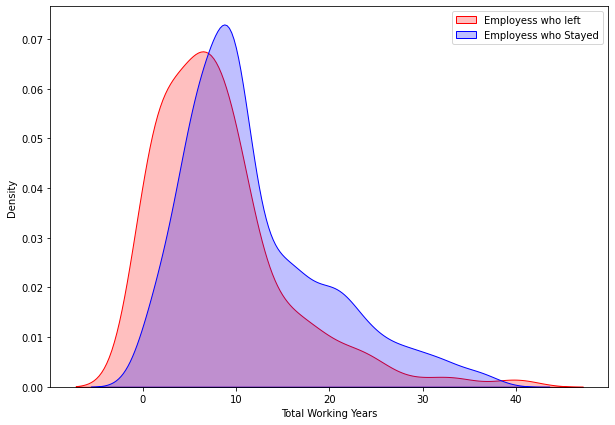

In [23]:
plt.figure(figsize = (10,7))
sns.kdeplot(left_df ['TotalWorkingYears'], label = 'Employess who left', shade = True, color ='r')
sns.kdeplot(stayed_df ['TotalWorkingYears'], label = 'Employess who Stayed', shade = True, color ='b')
plt.xlabel('Total Working Years')
plt.legend()

Between 0 to ~7years : people tends to leave. 


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

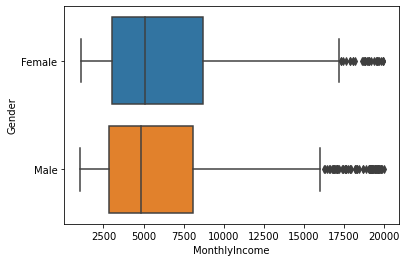

In [24]:
sns.boxplot(x = df_employee.MonthlyIncome, y = df_employee.Gender)

Wage parity looks good. Even female are paid slightly better which shows high organisational values. 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

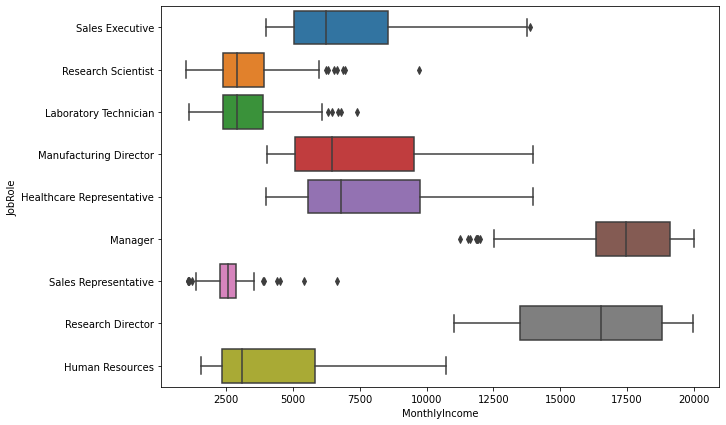

In [25]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df_employee.MonthlyIncome, y = df_employee.JobRole)

## Creating Testing and Training Dataset | Data Cleaning 

In [26]:
#seperating categoriacal variables 
# X_cat = df_employee[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [27]:
#seperating categorical and numerical variables 
def categorical_numerical_seperator(dataset):
  """
  Function to seperate categorical and numerical columns of dataset
  """
  cat = []
  num = []
  for i in dataset.columns:
    if dataset[i].dtype == 'object':
      cat.append(i)
    else:
      num.append(i)
  return cat, num

In [28]:
categorical, numerical = categorical_numerical_seperator(df_employee)
categorical, numerical

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus'],
 ['Age',
  'Attrition',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'OverTime',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

### Performing ANOVA of Continous variables with Attrition 
ANOVA(Analysis of Variance) is performed for continous variables with target variable with attrition. 
1. P-values are calculated during this process for continous variables. 
2. P-values less than 0.5 are features which are more dependent on target variable attrition

In [29]:
def ANOVA(df, cat, num):
  from statsmodels.formula.api import ols 
  eqn = str(num) + '~' + str(cat)
  model = ols(eqn,df).fit()
  from statsmodels.stats.anova import anova_lm
  Q = anova_lm(model)
  return Q.iloc[0:1,4:5].values[0][0]


In [31]:
q = []
for i in numerical:
  anv = ANOVA(df_employee, 'Attrition',i)
  q.append(anv)

In [37]:
q = pd.Series(q)
q.index = numerical
q = q.sort_values(ascending = True)
q

Attrition                   0.000000e+00
OverTime                    1.009254e-21
TotalWorkingYears           4.061878e-11
JobLevel                    6.795385e-11
YearsInCurrentRole          6.003186e-10
MonthlyIncome               7.147364e-10
Age                         8.356308e-10
YearsWithCurrManager        1.736987e-09
StockOptionLevel            1.301015e-07
YearsAtCompany              2.318872e-07
JobInvolvement              5.677065e-07
JobSatisfaction             7.043067e-05
EnvironmentSatisfaction     7.172339e-05
DistanceFromHome            2.793060e-03
WorkLifeBalance             1.421105e-02
TrainingTimesLastYear       2.257850e-02
DailyRate                   2.985816e-02
RelationshipSatisfaction    7.871363e-02
NumCompaniesWorked          9.552526e-02
YearsSinceLastPromotion     2.057900e-01
Education                   2.293152e-01
MonthlyRate                 5.611236e-01
PercentSalaryHike           6.056128e-01
HourlyRate                  7.931348e-01
PerformanceRatin

In [38]:
q[q<=0.5]

Attrition                   0.000000e+00
OverTime                    1.009254e-21
TotalWorkingYears           4.061878e-11
JobLevel                    6.795385e-11
YearsInCurrentRole          6.003186e-10
MonthlyIncome               7.147364e-10
Age                         8.356308e-10
YearsWithCurrManager        1.736987e-09
StockOptionLevel            1.301015e-07
YearsAtCompany              2.318872e-07
JobInvolvement              5.677065e-07
JobSatisfaction             7.043067e-05
EnvironmentSatisfaction     7.172339e-05
DistanceFromHome            2.793060e-03
WorkLifeBalance             1.421105e-02
TrainingTimesLastYear       2.257850e-02
DailyRate                   2.985816e-02
RelationshipSatisfaction    7.871363e-02
NumCompaniesWorked          9.552526e-02
YearsSinceLastPromotion     2.057900e-01
Education                   2.293152e-01
dtype: float64

In [43]:
imp_numerical_columns = list(q[q<=0.5].index)
imp_numerical_columns.remove('Attrition')
imp_numerical_columns

['OverTime',
 'TotalWorkingYears',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'Age',
 'YearsWithCurrManager',
 'StockOptionLevel',
 'YearsAtCompany',
 'JobInvolvement',
 'JobSatisfaction',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'WorkLifeBalance',
 'TrainingTimesLastYear',
 'DailyRate',
 'RelationshipSatisfaction',
 'NumCompaniesWorked',
 'YearsSinceLastPromotion',
 'Education']

In [44]:
len(imp_numerical_columns), len(numerical)

(20, 25)

### Performing Chisquare test
ChiSquare test is performed for checking dependency between categorical to categorical variables. 
1. P-value is calculated for each categorical variable with respect to Attrition 
2. Variables of P-values less than 0.05 are selected

In [49]:
def chisquare(df, cat1, cat2):
  import pandas as pd
  from scipy.stats import chi2_contingency  
  a,b,c,d = chi2_contingency(pd.crosstab(df[cat1], df[cat2]))
  return b 

Q = []
for i in categorical:
  Q.append(chisquare(df_employee, 'Attrition',i))

Q = pd.Series(Q)
Q.index = categorical
Q = Q.sort_values()
imp_categorical_columns = list(Q[Q<=0.5].index)
imp_categorical_columns, len(imp_categorical_columns), len(categorical)


(['JobRole',
  'MaritalStatus',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender'],
 6,
 6)

In [55]:
### One Hot encoding and combining categorical and continous variable
X1 = df_employee[imp_numerical_columns]
X2 = pd.get_dummies(df_employee[imp_categorical_columns])
X_all = pd.concat([X1, X2], axis =1)

In [57]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   OverTime                           1470 non-null   int64
 1   TotalWorkingYears                  1470 non-null   int64
 2   JobLevel                           1470 non-null   int64
 3   YearsInCurrentRole                 1470 non-null   int64
 4   MonthlyIncome                      1470 non-null   int64
 5   Age                                1470 non-null   int64
 6   YearsWithCurrManager               1470 non-null   int64
 7   StockOptionLevel                   1470 non-null   int64
 8   YearsAtCompany                     1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  EnvironmentSatisfaction            1470 non-null   int64
 12  DistanceFromHome    

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all.values)

In [60]:
X.shape

(1470, 46)

In [61]:
y = df_employee['Attrition']
y.shape


(1470,)

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [63]:
X_train.shape, X_test.shape

((1102, 46), (368, 46))

In [64]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [66]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred_lr = model_lr.predict(X_test)

In [68]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
from sklearn.metrics import confusion_matrix, classification_report 
print(f'Accuracy : {100*accuracy_score(y_pred_lr,y_test)}% ')

Accuracy : 89.13043478260869% 


<AxesSubplot:>

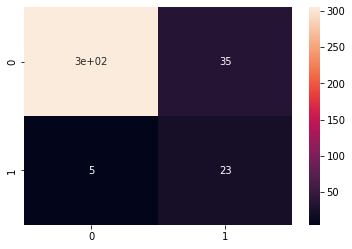

In [70]:
cm_lr = confusion_matrix (y_pred_lr, y_test)
sns.heatmap(cm_lr, annot = True)

In [71]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.82      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.89      0.89      0.87       368



In [72]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred_rfc = model_rfc.predict(X_test)

<AxesSubplot:>

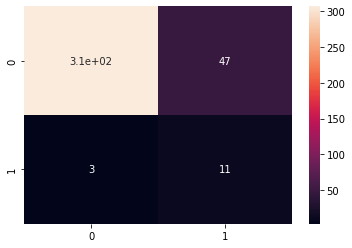

In [74]:
cm_rfc = confusion_matrix (y_pred_rfc, y_test)
sns.heatmap(cm_rfc, annot = True)

In [75]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       310
           1       0.79      0.19      0.31        58

    accuracy                           0.86       368
   macro avg       0.83      0.59      0.62       368
weighted avg       0.85      0.86      0.83       368



In [78]:
import tensorflow as tf 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [79]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100, batch_size =50)

Epoch 1/100
23/23 [==============================] - 2s 12ms/step - loss: 0.4375 - accuracy: 0.8285
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.3509 - accuracy: 0.8575
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3115 - accuracy: 0.8829
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2913 - accuracy: 0.8802
Epoch 5/100
23/23 [==============================] - 0s 15ms/step - loss: 0.3292 - accuracy: 0.8693
Epoch 6/100
23/23 [==============================] - 0s 17ms/step - loss: 0.2732 - accuracy: 0.8947
Epoch 7/100
23/23 [==============================] - 0s 18ms/step - loss: 0.2521 - accuracy: 0.9074
Epoch 8/100
23/23 [==============================] - 0s 17ms/step - loss: 0.2239 - accuracy: 0.9165
Epoch 9/100
23/23 [==============================] - 0s 17ms/step - loss: 0.1884 - accuracy: 0.9328
Epoch 10/100
23/23 [==============================] - 0s 19ms/step - loss: 0.1599 - accuracy: 0.9347

In [80]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


<AxesSubplot:>

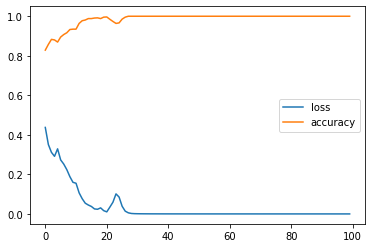

In [81]:
pd.DataFrame(history.history).plot()

<AxesSubplot:>

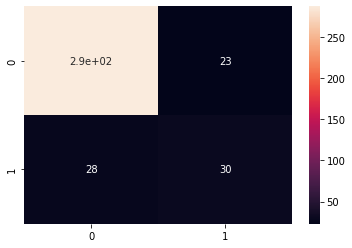

In [82]:
cm = confusion_matrix(y_test, tf.round(y_pred))
sns.heatmap(cm, annot=True)

In [83]:
print(classification_report(y_test, tf.round(y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       310
           1       0.57      0.52      0.54        58

    accuracy                           0.86       368
   macro avg       0.74      0.72      0.73       368
weighted avg       0.86      0.86      0.86       368

